In [1]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [55]:
DATA_PATH = 'data/food_time_clean.csv'

In [56]:
ds = pd.read_csv(DATA_PATH)

In [127]:
ds

,Traffic_Level,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km),TARGET,Weather Visibility
0,3.0,32.0,4.6,26.55,87.0,0.0,9.89,43.450000,5.0
1,3.0,33.0,4.7,17.51,69.0,0.0,19.11,3.816667,11.0
2,3.0,36.0,4.2,12.44,77.0,0.0,11.59,3.636667,11.0
3,3.0,23.0,4.7,19.37,65.0,0.0,21.93,49.450000,11.0
4,3.0,34.0,4.9,21.29,64.0,0.0,18.26,5.248333,7.0
...,...,...,...,...,...,...,...,...,...
9035,0.0,28.0,4.8,22.61,60.0,0.0,2.52,1.246667,6.0
9036,0.0,26.0,4.7,24.98,73.0,0.0,2.41,20.700000,5.0
9037,0.0,32.0,4.7,24.99,73.0,0.0,2.77,20.250000,5.0
9038,0.0,31.0,4.1,25.01,73.0,0.0,3.42,15.800000,5.0


In [58]:
ds = ds.drop('Unnamed: 0', axis=1)

In [126]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Traffic_Level            9040 non-null   float64
 1   Delivery_person_Age      9040 non-null   float64
 2   Delivery_person_Ratings  9040 non-null   float64
 3   temperature              9040 non-null   float64
 4   humidity                 9040 non-null   float64
 5   precipitation            9040 non-null   float64
 6   Distance (km)            9040 non-null   float64
 7   TARGET                   9040 non-null   float64
 8   Weather Visibility       9040 non-null   float64
dtypes: float64(9)
memory usage: 635.8 KB


In [61]:
ds.columns

Index(['Traffic_Level', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'temperature', 'humidity', 'precipitation', 'Distance (km)', 'TARGET',
       'Weather Visibility', 'Type_of_order_Drinks', 'Type_of_order_Meal',
       'Type_of_order_Snack', 'Type_of_vehicle_electric_scooter',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter'],
      dtype='object')

In [66]:
non_float_cols = ['Traffic_Level', 'Delivery_person_Age', 'Type_of_order_Drinks', 'Type_of_order_Meal',
       'Type_of_order_Snack', 'Type_of_vehicle_electric_scooter',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter', 'Weather Visibility']

In [67]:
for col in non_float_cols:
  ds[col] = ds[col].astype(float)

In [125]:
ds.to_csv('data/food_time_super_clean.csv')

In [115]:
X = np.array(ds.drop('TARGET', axis=1))
y = ds['TARGET']

In [116]:
test_size = 0.2
train_size = int(ds.shape[0] * (1 - test_size))
print(f"train: {train_size}, test: {test_size}")

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

train: 7232, test: 0.2


In [117]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

In [118]:
model = tf.keras.Sequential([
  normalizer,
  tf.keras.layers.Dense(256),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(64),
  
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(48),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1),
])
model.compile(
  loss=tf.keras.losses.MeanAbsolutePercentageError(),
  optimizer='adam',
)

In [119]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 8)                17        
 ion)                                                            
                                                                 
 dense_45 (Dense)            (None, 256)               2304      
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 48)                3120      
                                                     

In [121]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
226/226 [==============================] - 0s 1ms/step - loss: 38.5753
Epoch 2/30
226/226 [==============================] - 0s 1ms/step - loss: 38.5958
Epoch 3/30
226/226 [==============================] - 0s 1ms/step - loss: 38.6556
Epoch 4/30
226/226 [==============================] - 0s 1ms/step - loss: 38.6242
Epoch 5/30
226/226 [==============================] - 0s 1ms/step - loss: 38.5810
Epoch 6/30
226/226 [==============================] - 0s 2ms/step - loss: 38.4727
Epoch 7/30
226/226 [==============================] - 0s 1ms/step - loss: 38.3829
Epoch 8/30
226/226 [==============================] - 0s 1ms/step - loss: 38.4883
Epoch 9/30
226/226 [==============================] - 0s 1ms/step - loss: 38.4041
Epoch 10/30
226/226 [==============================] - 0s 1ms/step - loss: 38.4544
Epoch 11/30
226/226 [==============================] - 0s 1ms/step - loss: 38.3520
Epoch 12/30
226/226 [==============================] - 0s 1ms/step - loss: 38.4857
Epoch 13/30
2

In [122]:
y_pred = model.predict(X_test)

57/57 [==============================] - 0s 1ms/step


In [123]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R2: {r2} | MAPE: {mape}")

R2: -0.29086867204458766 | MAPE: 0.4768201580141396


In [113]:
ds = ds.drop(['Type_of_order_Drinks', 'Type_of_order_Meal',
       'Type_of_order_Snack',], axis=1)

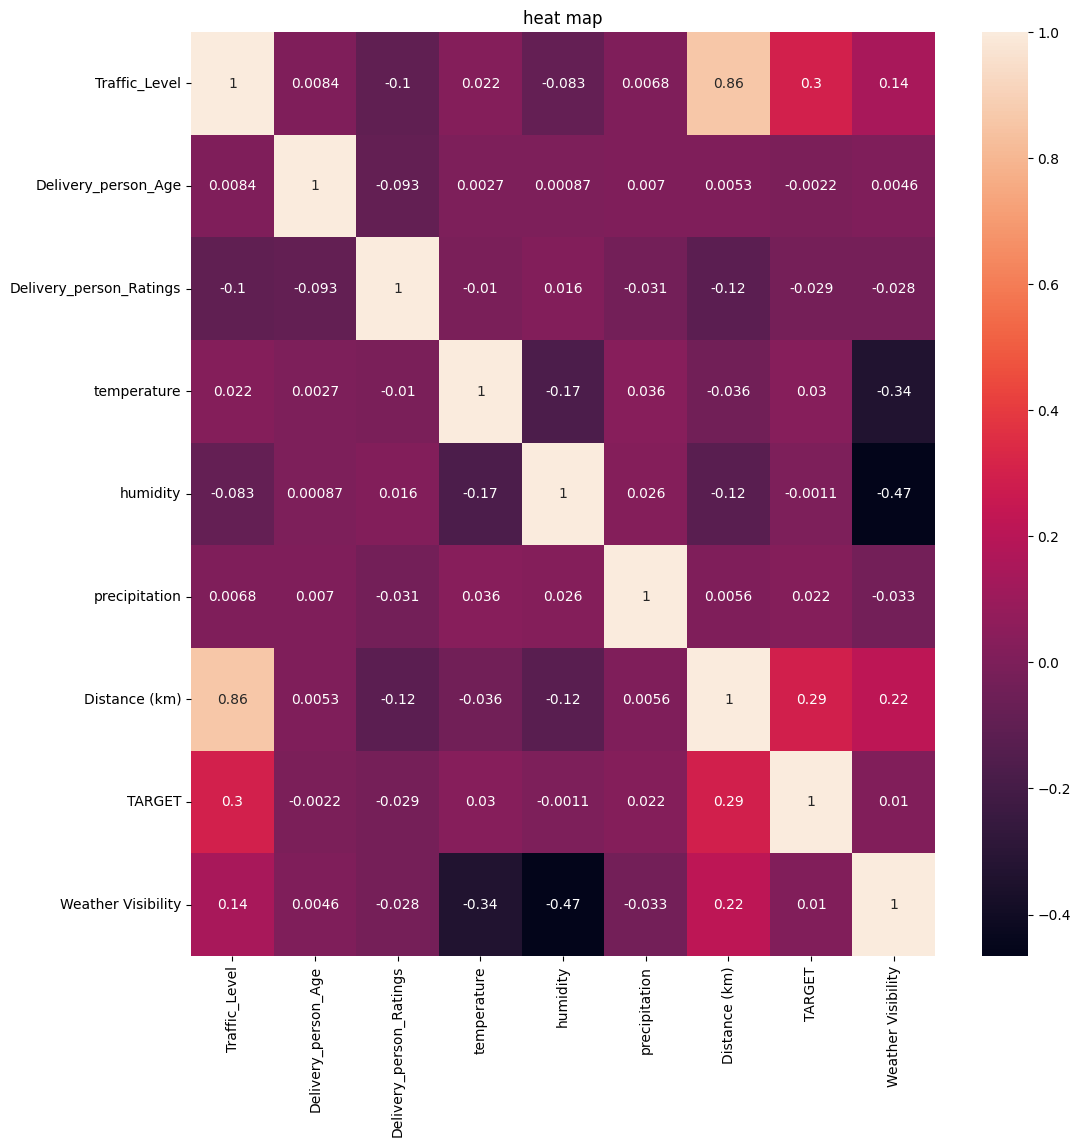

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_map = ds.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_map, annot=True)
plt.title('heat map')
plt.show()